<a href="https://colab.research.google.com/github/MarwanAhmed20/EDA-ON-Datasets/blob/main/heart_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

 94% 93.0M/98.8M [00:01<00:00, 92.6MB/s]
100% 98.8M/98.8M [00:01<00:00, 89.1MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
#test = pd.read_csv('mitbih_test.csv')
testdata = pd.read_csv('mitbih_test.csv',header=None)

In [ ]:
#df = pd.read_csv('mitbih_train.csv')
traindata = pd.read_csv('mitbih_train.csv',header=None)

# EDA

In [ ]:
traindata.shape

(87554, 188)

In [ ]:
traindata.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
traindata[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'U': 4]
* N: Normal beats 0
* S: Supraventricular ectopic beats 1
* V: Ventricular ectopic beats 2
* F: Fusion 3
* U: Unkwon 4

In [ ]:
target_col = traindata[187]

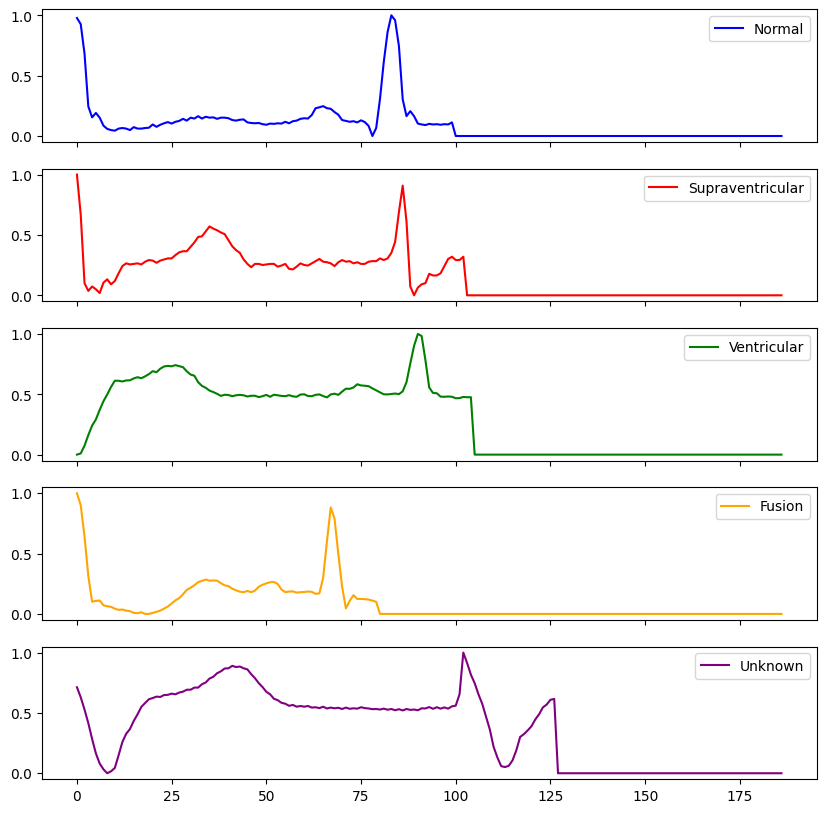

In [ ]:
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((traindata[traindata[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

In [ ]:
import numpy as np
X = traindata.iloc[:, :187]

# Generate random noise with mean 0 and standard deviation 0.1
noise = np.random.normal(loc=0, scale=0.1, size=X.shape)

In [ ]:
noisy_data = X + noise


In [ ]:
noisy_data.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.990390,0.964147,0.561346,0.342825,0.160292,0.148022,0.016064,-0.023704,0.106445,0.040850,...,0.001807,-0.087509,-0.001183,0.043408,0.028311,0.138431,-0.028133,0.021907,0.121946,-0.167726
1,0.921337,0.771269,0.364972,0.259029,-0.195904,0.273998,-0.100065,0.116185,0.089426,0.042652,...,-0.064403,-0.123074,-0.032620,-0.052794,0.100521,0.049526,0.029914,-0.130034,-0.072051,-0.056124
2,1.190161,0.703350,0.191671,0.122607,0.053229,0.018872,0.061387,-0.040019,0.112842,0.192871,...,0.017055,-0.071848,0.198253,0.095484,-0.069502,0.121652,0.005250,-0.059909,-0.088311,-0.039393
3,1.044908,0.718234,0.672911,0.436403,0.240052,-0.086295,-0.013290,0.072378,0.214280,0.012905,...,0.090409,0.117725,-0.066789,-0.045680,0.052945,-0.118881,-0.087123,0.176482,0.138801,-0.002962
4,1.060690,0.928090,0.875177,0.808418,0.366473,0.237618,0.280119,0.243297,0.151595,0.305780,...,0.223116,-0.084742,0.112486,0.008616,-0.031177,0.021977,0.068384,0.010755,0.028634,0.211216


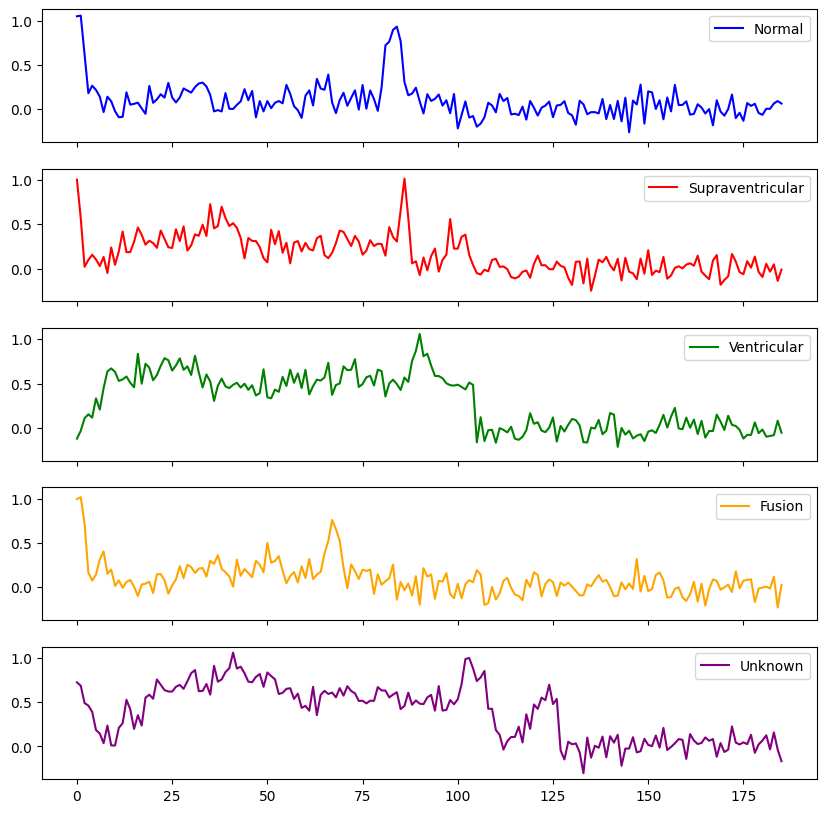

In [ ]:
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((noisy_data[traindata[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

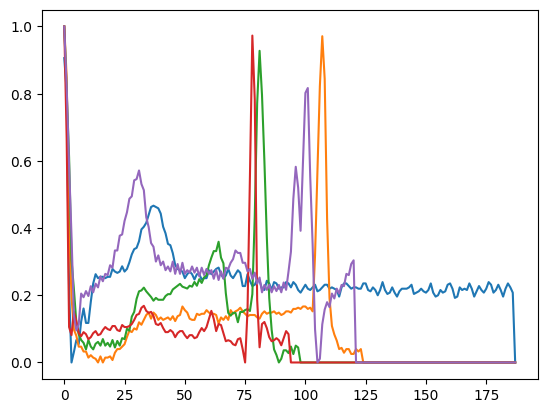

In [ ]:
for i in range(5000,5005):
    plt.plot(traindata.iloc[i])

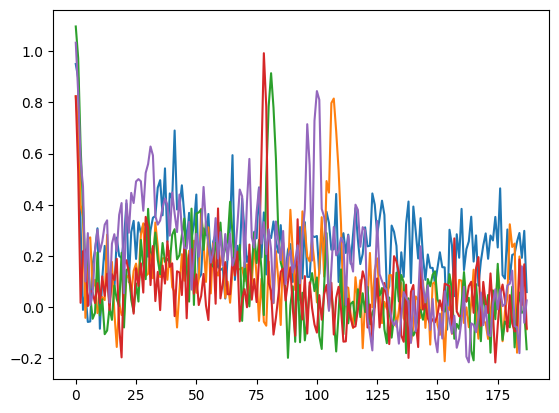

In [ ]:
for i in range(5000,5005):
    plt.plot(noisy_data.iloc[i])

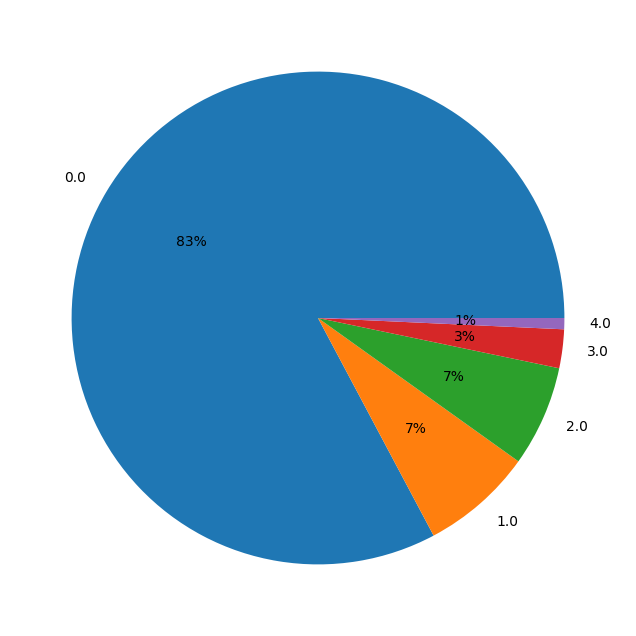

In [ ]:
plt.figure(figsize= (8,8))
plt.pie(traindata[187].value_counts(), autopct = '%0.0f%%',labels=traindata[187].unique())
plt.show()

# Clear

In [ ]:
X = np.array(traindata)[:, :187]
y = np.array(traindata)[:, 187]
X_test = np.array(testdata)[:, :187]
y_test = np.array(testdata)[:, 187]

In [ ]:
X.shape

(87554, 187)

In [ ]:
X_test.shape

(21892, 187)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_test.shape)
print(X_valid.shape)

(21892, 187)
(17511, 187)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()


In [ ]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=rf.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred))
print()
print(classification_report(y_valid,y_pred))

accuracy score For Validate 0.9756724344697618

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14579
         1.0       0.98      0.63      0.77       426
         2.0       0.97      0.87      0.92      1112
         3.0       0.92      0.64      0.76       145
         4.0       1.00      0.96      0.98      1249

    accuracy                           0.98     17511
   macro avg       0.97      0.82      0.88     17511
weighted avg       0.98      0.98      0.97     17511



In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.9733235885254887

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.98      0.59      0.74       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.88      0.56      0.68       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.79      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_pred_mlp = mlp.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred_mlp))
print()
print(classification_report(y_valid,y_pred_mlp))

accuracy score For Validate 0.9789846382273999

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14579
         1.0       0.82      0.76      0.79       426
         2.0       0.93      0.94      0.93      1112
         3.0       0.88      0.69      0.78       145
         4.0       0.98      0.99      0.98      1249

    accuracy                           0.98     17511
   macro avg       0.92      0.87      0.89     17511
weighted avg       0.98      0.98      0.98     17511



In [ ]:
y_pred_mlp = mlp.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_mlp))
print()
print(classification_report(y_test,y_pred_mlp))

accuracy score For test data 0.9791704732322309

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.82      0.74      0.78       556
         2.0       0.94      0.94      0.94      1448
         3.0       0.87      0.69      0.77       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.87      0.89     21892
weighted avg       0.98      0.98      0.98     21892



# resample

In [ ]:
df_1 = traindata[traindata[187] == 1]
df_2 = traindata[traindata[187] == 2]
df_3 = traindata[traindata[187] == 3]
df_4 = traindata[traindata[187] == 4]

In [ ]:
df_1.shape

(2223, 188)

In [ ]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0 = traindata[traindata[187]==0].sample(n =20000, random_state=123)

In [ ]:
df_4_upsample.shape

(20000, 188)

In [ ]:
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

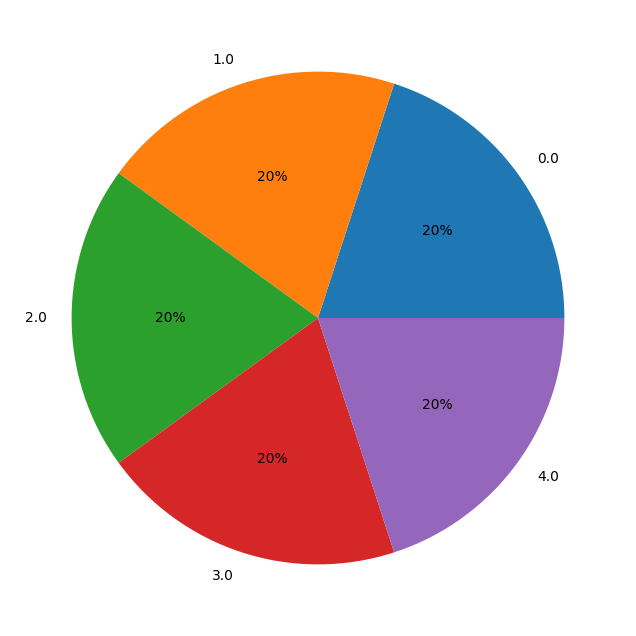

In [ ]:
plt.figure(figsize= (8,8))
plt.pie(train_df[187].value_counts(), autopct = '%0.0f%%',labels=traindata[187].unique())
plt.show()

In [ ]:
train_df.shape

(100000, 188)

In [ ]:
X = np.array(train_df)[:, :187]
y = np.array(train_df)[:, 187]
X_test = np.array(testdata)[:, :187]
y_test = np.array(testdata)[:, 187]

In [ ]:
X.shape

(100000, 187)

In [ ]:
X_test.shape

(21892, 187)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(80000, 187)
(20000, 187)
(21892, 187)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=rf.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred))
print()
print(classification_report(y_valid,y_pred))

accuracy score For Validate 0.9968

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4018
         1.0       0.99      1.00      1.00      4015
         2.0       1.00      1.00      1.00      4002
         3.0       1.00      1.00      1.00      3987
         4.0       1.00      1.00      1.00      3978

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.9748309884889458

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.79      0.74      0.77       556
         2.0       0.93      0.94      0.94      1448
         3.0       0.78      0.72      0.75       162
         4.0       0.98      0.97      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.89      0.87      0.88     21892
weighted avg       0.97      0.97      0.97     21892



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_pred_mlp = mlp.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred_mlp))
print()
print(classification_report(y_valid,y_pred_mlp))

accuracy score For Validate 0.9904

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      4018
         1.0       0.98      1.00      0.99      4015
         2.0       0.99      0.99      0.99      4002
         3.0       0.99      1.00      1.00      3987
         4.0       1.00      1.00      1.00      3978

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
y_pred_mlp = mlp.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_mlp))
print()
print(classification_report(y_test,y_pred_mlp))

accuracy score For test data 0.9634112917960899

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.62      0.80      0.70       556
         2.0       0.87      0.96      0.91      1448
         3.0       0.55      0.81      0.66       162
         4.0       0.97      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.91      0.84     21892
weighted avg       0.97      0.96      0.97     21892



# SMOTE


In [ ]:
X = np.array(traindata)[:, :187]
y = np.array(traindata)[:, 187]
X_test = np.array(testdata)[:, :187]
y_test = np.array(testdata)[:, 187]

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

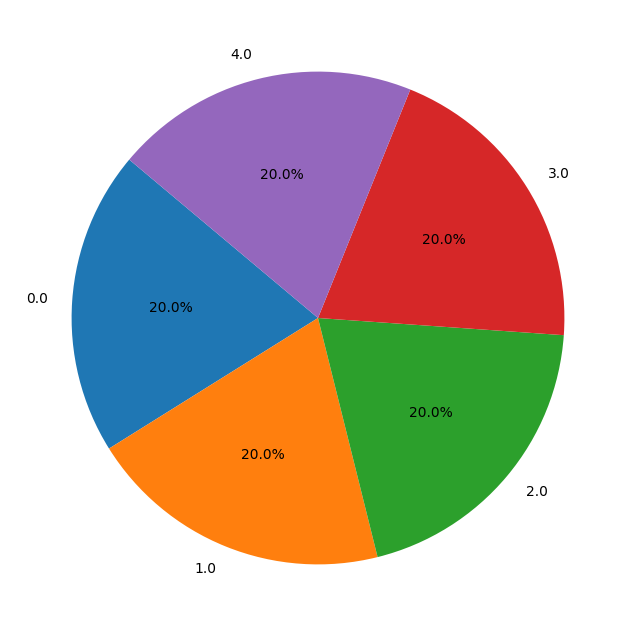

In [ ]:
class_counts = {label: count for label, count in zip(*np.unique(y_resampled, return_counts=True))}

plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.show()

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(362355, 187)
(362355,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(289884, 187)
(72471, 187)
(21892, 187)


In [ ]:
X_train = X_resampled
y_train = y_resampled

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=rf.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred))
print()
print(classification_report(y_valid,y_pred))

accuracy score For Validate 0.9968125181106926

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14462
         1.0       1.00      1.00      1.00     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.9795815823131737

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.83      0.77      0.80       556
         2.0       0.96      0.94      0.95      1448
         3.0       0.78      0.77      0.77       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.89      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.9802210853279737

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.87      0.76      0.81       556
         2.0       0.96      0.93      0.95      1448
         3.0       0.79      0.76      0.78       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_pred_mlp = mlp.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred_mlp))
print()
print(classification_report(y_valid,y_pred_mlp))

accuracy score For Validate 0.9959983993597439

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     14462
         1.0       0.99      1.00      0.99     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



In [ ]:
y_pred_mlp = mlp.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_mlp))
print()
print(classification_report(y_test,y_pred_mlp))

accuracy score For test data 0.9744198794080029

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     18118
         1.0       0.66      0.81      0.73       556
         2.0       0.95      0.94      0.95      1448
         3.0       0.71      0.81      0.76       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.86      0.90      0.88     21892
weighted avg       0.98      0.97      0.98     21892



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

# Training the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xg = xgb_model.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_xg))
print()
print(classification_report(y_test,y_pred_xg))

accuracy score For test data 0.9680248492600037

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     18118
         1.0       0.61      0.80      0.69       556
         2.0       0.93      0.94      0.94      1448
         3.0       0.58      0.83      0.68       162
         4.0       0.98      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.82      0.91      0.86     21892
weighted avg       0.97      0.97      0.97     21892



# SMOTE 2


In [ ]:
X = np.array(traindata)[:, :150]
y = np.array(traindata)[:, 187]
X_test = np.array(testdata)[:, :150]
y_test = np.array(testdata)[:, 187]

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(362355, 120)
(362355,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(289884, 130)
(72471, 130)
(21892, 130)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=rf.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred))
print()
print(classification_report(y_valid,y_pred))

accuracy score For Validate 0.9971160878144362

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     14462
         1.0       1.00      1.00      1.00     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.9799926913941166

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.85      0.76      0.81       556
         2.0       0.96      0.94      0.95      1448
         3.0       0.80      0.77      0.79       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.89      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_pred_mlp = mlp.predict(X_valid)
print('accuracy score For Validate',accuracy_score(y_valid,y_pred_mlp))
print()
print(classification_report(y_valid,y_pred_mlp))

accuracy score For Validate 0.9953636627064619

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14462
         1.0       0.99      1.00      0.99     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



In [ ]:
y_pred_mlp = mlp.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_mlp))
print()
print(classification_report(y_test,y_pred_mlp))

accuracy score For test data 0.9770692490407454

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.72      0.81      0.77       556
         2.0       0.95      0.94      0.94      1448
         3.0       0.78      0.78      0.78       162
         4.0       0.98      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.89      0.90      0.89     21892
weighted avg       0.98      0.98      0.98     21892



# SMOTE 2


In [ ]:
df_1 = traindata[traindata[187] == 1]
df_2 = traindata[traindata[187] == 2]
df_3 = traindata[traindata[187] == 3]
df_4 = traindata[traindata[187] == 4]

In [ ]:
df_1.shape

(2223, 188)

In [ ]:
from sklearn.utils import resample

df_1 = resample(df_1, n_samples = 1000, replace = True, random_state = 123)
df_2 = resample(df_2, n_samples = 1000, replace = True, random_state = 123)
df_3 = resample(df_3, n_samples = 1000, replace = True, random_state = 123)
df_4 = resample(df_4, n_samples = 1000, replace = True, random_state = 123)

df_0 = traindata[traindata[187]==0].sample(n =1000, random_state=123)

In [ ]:
train_df = pd.concat([df_0, df_1, df_2, df_3, df_4])

In [ ]:
print(train_df.shape)

(3205, 188)


In [ ]:
X_train = train_df.iloc[:, :187]
y_train = train_df.iloc[:, 187]
X_test = testdata.iloc[:, :187]
y_test = testdata.iloc[:, 187]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=rf.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score For test data 0.8985017357938974

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     18118
         1.0       0.35      0.79      0.48       556
         2.0       0.75      0.90      0.82      1448
         3.0       0.19      0.89      0.31       162
         4.0       0.94      0.95      0.94      1608

    accuracy                           0.90     21892
   macro avg       0.64      0.89      0.70     21892
weighted avg       0.94      0.90      0.92     21892



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_pred_mlp = mlp.predict(X_test)
print('accuracy score For test data',accuracy_score(y_test,y_pred_mlp))
print()
print(classification_report(y_test,y_pred_mlp))

accuracy score For test data 0.9226658139959802

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     18118
         1.0       0.40      0.71      0.51       556
         2.0       0.79      0.88      0.83      1448
         3.0       0.30      0.78      0.43       162
         4.0       0.92      0.95      0.94      1608

    accuracy                           0.92     21892
   macro avg       0.68      0.85      0.73     21892
weighted avg       0.94      0.92      0.93     21892



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_clf = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

In [ ]:
base_classifiers = [rf_clf,svm_clf, clf_clf]

# Define the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=None, n_estimators=10, random_state=42)

# Train the bagging classifier with the base classifiers
bagging_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Bagging Accuracy: 0.873652475790243
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92     18118
         1.0       0.28      0.77      0.42       556
         2.0       0.69      0.87      0.77      1448
         3.0       0.19      0.86      0.31       162
         4.0       0.84      0.94      0.89      1608

    accuracy                           0.87     21892
   macro avg       0.60      0.86      0.66     21892
weighted avg       0.93      0.87      0.89     21892



In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = LogisticRegression(max_iter=1000, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Initialize AdaBoost with base classifiers
ada_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=50, random_state=42)

# Train the ensemble model
ada_clf.fit(X_train, y_train)


# Make predictions
y_pred = ada_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9017449296546683
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     18118
         1.0       0.36      0.78      0.49       556
         2.0       0.77      0.89      0.82      1448
         3.0       0.19      0.88      0.31       162
         4.0       0.93      0.95      0.94      1608

    accuracy                           0.90     21892
   macro avg       0.64      0.88      0.70     21892
weighted avg       0.95      0.90      0.92     21892



#Nural network

In [ ]:
X_train = np.array(traindata)[:, :187]
y_train = np.array(traindata)[:, 187]
X_test = np.array(testdata)[:, :187]
y_test = np.array(testdata)[:, 187]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train.shape

(87554, 187)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=187, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                12032     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 14277 (55.77 KB)
Trainable params: 14277 (55.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/200
1369/1369 [==============================] - 10s 4ms/step - loss: 0.3008 - accuracy: 0.9177 - val_loss: 0.2099 - val_accuracy: 0.9451
Epoch 2/200
1369/1369 [==============================] - 7s 5ms/step - loss: 0.1728 - accuracy: 0.9530 - val_loss: 0.1721 - val_accuracy: 0.9553
Epoch 3/200
1369/1369 [==============================] - 5s 4ms/step - loss: 0.1448 - accuracy: 0.9603 - val_loss: 0.1477 - val_accuracy: 0.9599
Epoch 4/200
1369/1369 [==============================] - 5s 4ms/step - loss: 0.1295 - accuracy: 0.9645 - val_loss: 0.1393 - val_accuracy: 0.9606
Epoch 5/200
1369/1369 [==============================] - 7s 5ms/step - loss: 0.1183 - accuracy: 0.9670 - val_loss: 0.1216 - val_accuracy: 0.9678
Epoch 6/200
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1107 - accuracy: 0.9690 - val_loss: 0.1275 - val_accuracy: 0.9659
Epoch 7/200
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1044 - accuracy: 0.9710 - val_loss: 0.1153 - val_a

In [ ]:
from sklearn.metrics import classification_report

# Get predictions for the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes)
print(report)

685/685 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.80      0.75      0.77       556
         2.0       0.93      0.94      0.93      1448
         3.0       0.79      0.69      0.74       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.87      0.88     21892
weighted avg       0.98      0.98      0.98     21892



#CNN

In [ ]:
df_1 = traindata[traindata[187] == 1]
df_2 = traindata[traindata[187] == 2]
df_3 = traindata[traindata[187] == 3]
df_4 = traindata[traindata[187] == 4]

In [ ]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 2000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 2000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 2000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 2000, replace = True, random_state = 123)
df_0 = traindata[traindata[187]==0].sample(n =2000, random_state=123)

In [ ]:
X.shape

(87554, 187)

In [ ]:
X_test.shape

(21892, 187)

In [ ]:
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
X_train = np.array(traindata)[:, :150]
y_train = np.array(traindata)[:, 187]
X_test = np.array(testdata)[:, :150]
y_test = np.array(testdata)[:, 187]

In [ ]:
X_train.shape

(87554, 150)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(2, kernel_size=3, activation='relu', input_shape=(150,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())


model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 148, 2)            8         
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 74, 2)             0         
 ng1D)                                                           
                                                                 
 conv1d_20 (Conv1D)          (None, 72, 8)             56        
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 36, 8)             0         
 ng1D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 288)               0         
                                                                 
 dense_12 (Dense)            (None, 5)               

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size = 64,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1369/1369 [==============================] - 7s 5ms/step - loss: 0.4431 - accuracy: 0.8716 - val_loss: 0.3035 - val_accuracy: 0.9055
Epoch 2/30
1369/1369 [==============================] - 6s 4ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 0.2237 - val_accuracy: 0.9413
Epoch 3/30
1369/1369 [==============================] - 5s 4ms/step - loss: 0.2031 - accuracy: 0.9447 - val_loss: 0.2049 - val_accuracy: 0.9439
Epoch 4/30
1369/1369 [==============================] - 7s 5ms/step - loss: 0.1868 - accuracy: 0.9491 - val_loss: 0.1926 - val_accuracy: 0.9486
Epoch 5/30
1369/1369 [==============================] - 5s 4ms/step - loss: 0.1764 - accuracy: 0.9520 - val_loss: 0.1867 - val_accuracy: 0.9503
Epoch 6/30
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1683 - accuracy: 0.9533 - val_loss: 0.1758 - val_accuracy: 0.9530
Epoch 7/30
1369/1369 [==============================] - 7s 5ms/step - loss: 0.1615 - accuracy: 0.9556 - val_loss: 0.1701 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_test),axis=1)

report = classification_report(y_test, y_pred)
print(report)


685/685 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18118
         1.0       0.86      0.54      0.67       556
         2.0       0.91      0.86      0.88      1448
         3.0       0.71      0.57      0.63       162
         4.0       0.98      0.94      0.96      1608

    accuracy                           0.96     21892
   macro avg       0.89      0.78      0.82     21892
weighted avg       0.96      0.96      0.96     21892



#CT-Scan

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 99% 229M/230M [00:07<00:00, 34.7MB/s]
100% 230M/230M [00:07<00:00, 32.8MB/s]


In [ ]:
!unzip sarscov2-ctscan-dataset.zip

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [ ]:
import cv2
import os

def read_images_from_folder(folder_path, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            if image is not None:
                # Resize the image
                resized_image = cv2.resize(image, target_size)
                images.append(resized_image)
            else:
                print(f"Unable to read image: {img_path}")
    return images


# Example usage:

target_size = (224, 224)  # Specify the target size for the images

covid_train = read_images_from_folder('/content/COVID', target_size)
normal_train = read_images_from_folder('/content/non-COVID', target_size)

In [ ]:
normal_train.shape

(1229, 224, 224, 3)

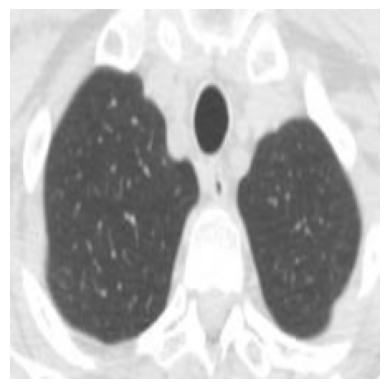

In [ ]:

def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # OpenCV reads images in BGR format, so we convert it to RGB for Matplotlib
    plt.axis('off')  # Turn off axis
    plt.show()
plot_image(normal_train[0])



In [ ]:
X_Train = np.array(normal_train + covid_train)
y_train = np.array([0 for i in range(0,len(normal_train)) ] + [1 for i in range(len(covid_train),len(X_test))])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_Train,
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state = 42)

print(f'X_train:',X_train.shape)
print(f'X_val:',X_val.shape)
print(f'Y_train:',Y_train.shape)
print(f'Y_val:',Y_val.shape)

ValueError: Found input variables with inconsistent numbers of samples: [2481, 2458]